In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from analysis_utils import *

In [3]:
# Load the data
disbiome_md_path = '../data/MAGNN_data/disbiome_taxid_mondo.dat'
disbiome_md_df = load_data(disbiome_md_path, colname1="microbe", colname2="disease")
gmmad2_md_path = '../data/MAGNN_data/gmmad2_taxid_mondo.dat'
gmmad2_md_df = load_data(gmmad2_md_path, colname1="microbe", colname2="disease")
md_combined_df = merge_df([disbiome_md_df, gmmad2_md_df])

gmmad2_mm_path = '../data/MAGNN_data/gmmad2_taxid_met.dat'
gmmad2_mm_df = load_data(gmmad2_mm_path, colname1="microbe", colname2="metabolite")
hmdb_mm_path = '../data/MAGNN_data/hmdb_taxid_met.dat'
hmdb_mm_df = load_data(hmdb_mm_path, colname1="microbe", colname2="metabolite")
mm_combined_df = merge_df([gmmad2_mm_df, hmdb_mm_df])

metd_path = "../data/MAGNN_data/hmdb_met_disease.dat"
metd_df = load_data(metd_path,colname1="metabolite", colname2="disease")
print(metd_df.count())

Total count of edges: 
microbe    505325
disease    505325
dtype: int64
Total count of edges: 
microbe       599176
metabolite    599176
dtype: int64
metabolite    27546
disease       27546
dtype: int64


In [3]:
G = nx.Graph()

for _, row in md_combined_df.iterrows():
    G.add_edge(row["microbe"], row["disease"])

for _, row in mm_combined_df.iterrows():
    G.add_edge(row['microbe'], row['metabolite'])

for _, row in metd_df.iterrows():
    G.add_edge(row['metabolite'], row['disease'])
    

In [4]:
microbe_degrees = [degree for node, degree in G.degree() if 'microbe' in node]
metabolite_degrees = [degree for node, degree in G.degree() if 'metabolite' in node]
disease_degrees = [degree for node, degree in G.degree() if 'disease' in node]

In [5]:
density = nx.density(G)
components = nx.number_connected_components(G)
degree_correlation = nx.degree_assortativity_coefficient(G)

print(f"Graph Density: {density*100}% of the possible connections between nodes")
print(f"Number of distinct sub-networks within overall network: {components}")
print(f"Degree Correlation where high-degree nodes are connected to peripheral nodes: {degree_correlation}")

Graph Density: 0.20888576318715205% of the possible connections between nodes
Number of distinct sub-networks within overall network: 27
Degree Correlation where high-degree nodes are connected to peripheral nodes: -0.38043422383946


In [10]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

# Draw the network with node size proportional to their degree
node_sizes = [50 + 10*G.degree(n) for n in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.3)

plt.title("Overall Network Visualization")
plt.show()


KeyboardInterrupt



<Figure size 1200x800 with 0 Axes>

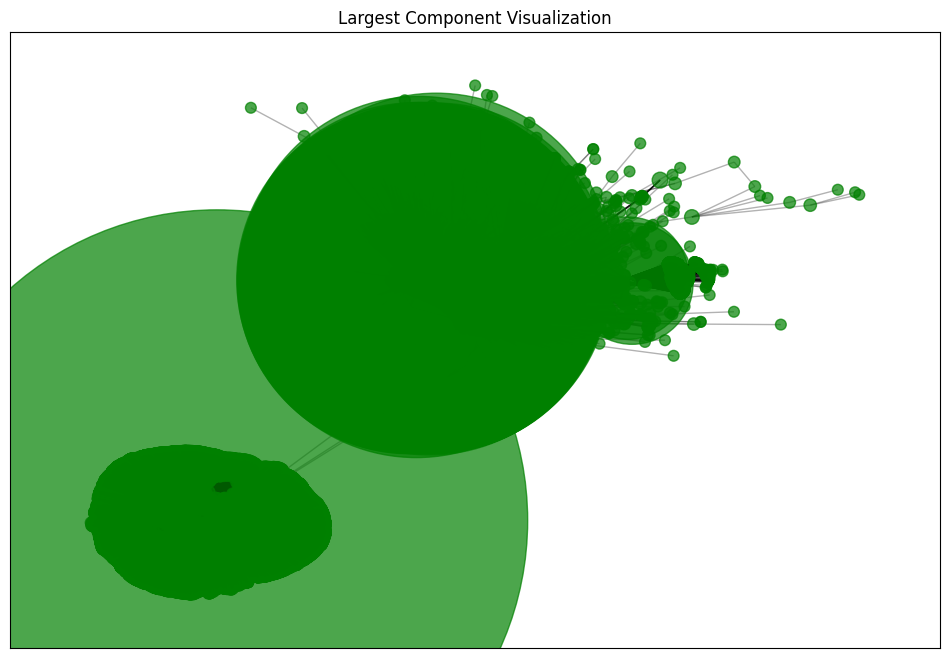

In [9]:
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)

plt.figure(figsize=(12, 8), dpi=500)

# Adjust layout, node size, and transparency
pos = nx.spring_layout(subgraph, seed=42, k=0.15, iterations=50)

node_sizes = [20 + 5 * subgraph.degree(n) for n in subgraph.nodes()]
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='green', alpha=0.6)
nx.draw_networkx_edges(subgraph, pos, alpha=0.2, width=0.5)

plt.title("Largest Connected Component of the Network")
plt.show()

In [ ]:
degrees = [G.degree(n) for n in G.nodes()]
    
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=30, color='purple', alpha=0.7)
plt.title("Degree Distribution of the Network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()